# Лабораторная 1

In [2]:
from turtledemo.penrose import start

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.linalg import pinvh
from scipy.ndimage import label


## I. Подготовка данных и базовые операции с NumPy

### 1. Загрузка и подготовка данных:

#### Загрузите набор данных о прокате велосипедов в Сеуле и исследуйте его структуру.

In [3]:
# загрузка данных

data = np.genfromtxt('SeoulBikeData.csv', delimiter=',', names=True, dtype=None)


In [4]:
# первые 5 строк

data[:5]


array([('01/12/2017', 254, 0, -5.2, 37, 2.2, 2000, -17.6, 0., 0., 0., 'Winter', 'No Holiday', 'Yes'),
       ('01/12/2017', 204, 1, -5.5, 38, 0.8, 2000, -17.6, 0., 0., 0., 'Winter', 'No Holiday', 'Yes'),
       ('01/12/2017', 173, 2, -6. , 39, 1. , 2000, -17.7, 0., 0., 0., 'Winter', 'No Holiday', 'Yes'),
       ('01/12/2017', 107, 3, -6.2, 40, 0.9, 2000, -17.6, 0., 0., 0., 'Winter', 'No Holiday', 'Yes'),
       ('01/12/2017',  78, 4, -6. , 36, 2.3, 2000, -18.6, 0., 0., 0., 'Winter', 'No Holiday', 'Yes')],
      dtype=[('Date', '<U10'), ('Rented_Bike_Count', '<i8'), ('Hour', '<i8'), ('Temperature°C', '<f8'), ('Humidity', '<i8'), ('Wind_speed_ms', '<f8'), ('Visibility_10m', '<i8'), ('Dew_point_temperature°C', '<f8'), ('Solar_Radiation_MJm2', '<f8'), ('Rainfallmm', '<f8'), ('Snowfall_cm', '<f8'), ('Seasons', '<U6'), ('Holiday', '<U10'), ('Functioning_Day', '<U3')])

In [5]:
# размер данных

data_length = data.shape[0]
data_length


8760

In [6]:
# анализ каждого столбца

for name in data.dtype.names:
    unique_values = np.unique(data[name])

    print(name)
    print('Тип:', unique_values.dtype)

    if len(unique_values) < 5:
        print('Уникальные значения:', unique_values)
    else:
        print('Первые 5 уникальных значений:', unique_values[:5], 'Всего:', len(unique_values))

    if np.issubdtype(unique_values.dtype, np.number):
        print('Минимум:', np.min(unique_values), 'Максимум:', np.max(unique_values))

    print()


Date
Тип: <U10
Первые 5 уникальных значений: ['01/01/2018' '01/02/2018' '01/03/2018' '01/04/2018' '01/05/2018'] Всего: 365

Rented_Bike_Count
Тип: int64
Первые 5 уникальных значений: [0 2 3 4 5] Всего: 2166
Минимум: 0 Максимум: 3556

Hour
Тип: int64
Первые 5 уникальных значений: [0 1 2 3 4] Всего: 24
Минимум: 0 Максимум: 23

Temperature°C
Тип: float64
Первые 5 уникальных значений: [-17.8 -17.5 -17.4 -16.9 -16.5] Всего: 546
Минимум: -17.8 Максимум: 39.4

Humidity
Тип: int64
Первые 5 уникальных значений: [ 0 10 11 12 13] Всего: 90
Минимум: 0 Максимум: 98

Wind_speed_ms
Тип: float64
Первые 5 уникальных значений: [0.  0.1 0.2 0.3 0.4] Всего: 65
Минимум: 0.0 Максимум: 7.4

Visibility_10m
Тип: int64
Первые 5 уникальных значений: [27 33 34 38 53] Всего: 1789
Минимум: 27 Максимум: 2000

Dew_point_temperature°C
Тип: float64
Первые 5 уникальных значений: [-30.6 -30.5 -29.8 -29.7 -29.6] Всего: 556
Минимум: -30.6 Максимум: 27.2

Solar_Radiation_MJm2
Тип: float64
Первые 5 уникальных значений: [0.  

#### Выполните предварительную обработку данных (например, удалите пропущенные значения или преобразуйте категориальные переменные).

In [7]:
# проверка на пропущенные значения

for name in data.dtype.names:
    if np.issubdtype(data[name].dtype, np.number):
        print(name, np.isnan(data[name]).sum())
    else:
        print(name, np.char.equal(data[name], '').sum())


Date 0
Rented_Bike_Count 0
Hour 0
Temperature°C 0
Humidity 0
Wind_speed_ms 0
Visibility_10m 0
Dew_point_temperature°C 0
Solar_Radiation_MJm2 0
Rainfallmm 0
Snowfall_cm 0
Seasons 0
Holiday 0
Functioning_Day 0


In [8]:
# преобразование даты из строкового формата Д/М/Г в числовой формат

date = data['Date']

date = np.array(
    [np.datetime64(
        f'{d.split('/')[2]}-{d.split('/')[1]}-{d.split('/')[0]}')
        for d in date])

date_numeric = date.astype('int')
date_numeric = date_numeric - np.min(date_numeric)

(date, date_numeric)


(array(['2017-12-01', '2017-12-01', '2017-12-01', ..., '2018-11-30',
        '2018-11-30', '2018-11-30'], shape=(8760,), dtype='datetime64[D]'),
 array([  0,   0,   0, ..., 364, 364, 364], shape=(8760,)))

In [9]:
# преобразование категориальных переменных

season = data['Seasons']
season_numeric = np.array([0 if s == 'Winter' else 1 if s == 'Spring' else 2 if s == 'Summer' else 3 for s in season])

holiday = data['Holiday']
holiday_numeric = np.array([1 if h == 'Holiday' else 0 for h in holiday])

functioning_day = data['Functioning_Day']
functioning_day_numeric = np.array([1 if f == 'Yes' else 0 for f in functioning_day])

(season, season_numeric, holiday, holiday_numeric, functioning_day, functioning_day_numeric)


(array(['Winter', 'Winter', 'Winter', ..., 'Autumn', 'Autumn', 'Autumn'],
       shape=(8760,), dtype='<U6'),
 array([0, 0, 0, ..., 3, 3, 3], shape=(8760,)),
 array(['No Holiday', 'No Holiday', 'No Holiday', ..., 'No Holiday',
        'No Holiday', 'No Holiday'], shape=(8760,), dtype='<U10'),
 array([0, 0, 0, ..., 0, 0, 0], shape=(8760,)),
 array(['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'],
       shape=(8760,), dtype='<U3'),
 array([1, 1, 1, ..., 1, 1, 1], shape=(8760,)))

In [10]:
# новая матрица числовых данных

columns = [
    ("Date", date.dtype, date),
    *[
        (name, np.float64, data[name]) if np.issubdtype(data[name].dtype, np.number)
        else (name, data[name].dtype, data[name])
        for name in data.dtype.names[1:]
    ],
    ("Date_numeric", np.float64, date_numeric),
    ("Season_numeric", np.float64, season_numeric),
    ("Holiday_numeric", np.float64, holiday_numeric),
    ("Functioning_day_numeric", np.float64, functioning_day_numeric),
]

dtype = [(name, dtype) for name, dtype, _ in columns]
data = np.array(list(zip(*[values for _, _, values in columns])), dtype=dtype)

data[:5]


array([('2017-12-01', 254., 0., -5.2, 37., 2.2, 2000., -17.6, 0., 0., 0., 'Winter', 'No Holiday', 'Yes', 0., 0., 0., 1.),
       ('2017-12-01', 204., 1., -5.5, 38., 0.8, 2000., -17.6, 0., 0., 0., 'Winter', 'No Holiday', 'Yes', 0., 0., 0., 1.),
       ('2017-12-01', 173., 2., -6. , 39., 1. , 2000., -17.7, 0., 0., 0., 'Winter', 'No Holiday', 'Yes', 0., 0., 0., 1.),
       ('2017-12-01', 107., 3., -6.2, 40., 0.9, 2000., -17.6, 0., 0., 0., 'Winter', 'No Holiday', 'Yes', 0., 0., 0., 1.),
       ('2017-12-01',  78., 4., -6. , 36., 2.3, 2000., -18.6, 0., 0., 0., 'Winter', 'No Holiday', 'Yes', 0., 0., 0., 1.)],
      dtype=[('Date', '<M8[D]'), ('Rented_Bike_Count', '<f8'), ('Hour', '<f8'), ('Temperature°C', '<f8'), ('Humidity', '<f8'), ('Wind_speed_ms', '<f8'), ('Visibility_10m', '<f8'), ('Dew_point_temperature°C', '<f8'), ('Solar_Radiation_MJm2', '<f8'), ('Rainfallmm', '<f8'), ('Snowfall_cm', '<f8'), ('Seasons', '<U6'), ('Holiday', '<U10'), ('Functioning_Day', '<U3'), ('Date_numeric', '<f8'),

### 2. Основные операции с NumPy:


#### Создайте векторы и матрицы с использованием np.array(), соответствующие данным из набора. Это могут быть временные ряды или другие важные метрики.

#### Используйте матрицы и векторы для представления различных параметров, таких как количество прокачанных велосипедов, температура, влажность и другие переменные.

##### Векторы:

In [11]:
date = data['Date']
date_numeric = data['Date_numeric']
rented_bike_count = data['Rented_Bike_Count']
hour = data['Hour']
temperature = data['Temperature°C']
humidity = data['Humidity']
wind_speed = data['Wind_speed_ms']
visibility = data['Visibility_10m']
dew_point_temperature = data['Dew_point_temperature°C']
solar_radiation = data['Solar_Radiation_MJm2']
rainfall = data['Rainfallmm']
snowfall = data['Snowfall_cm']
season = data['Seasons']
season_numeric = data['Season_numeric']
holiday = data['Holiday']
holiday_numeric = data['Holiday_numeric']
functioning_day = data['Functioning_Day']
functioning_day_numeric = data['Functioning_day_numeric']

(date, date_numeric, rented_bike_count, hour, temperature, humidity, wind_speed, visibility, dew_point_temperature,
 solar_radiation, rainfall, snowfall, season, season_numeric, holiday, holiday_numeric, functioning_day,
 functioning_day_numeric)


(array(['2017-12-01', '2017-12-01', '2017-12-01', ..., '2018-11-30',
        '2018-11-30', '2018-11-30'], shape=(8760,), dtype='datetime64[D]'),
 array([  0.,   0.,   0., ..., 364., 364., 364.], shape=(8760,)),
 array([254., 204., 173., ..., 694., 712., 584.], shape=(8760,)),
 array([ 0.,  1.,  2., ..., 21., 22., 23.], shape=(8760,)),
 array([-5.2, -5.5, -6. , ...,  2.6,  2.1,  1.9], shape=(8760,)),
 array([37., 38., 39., ..., 39., 41., 43.], shape=(8760,)),
 array([2.2, 0.8, 1. , ..., 0.3, 1. , 1.3], shape=(8760,)),
 array([2000., 2000., 2000., ..., 1968., 1859., 1909.], shape=(8760,)),
 array([-17.6, -17.6, -17.7, ...,  -9.9,  -9.8,  -9.3], shape=(8760,)),
 array([0., 0., 0., ..., 0., 0., 0.], shape=(8760,)),
 array([0., 0., 0., ..., 0., 0., 0.], shape=(8760,)),
 array([0., 0., 0., ..., 0., 0., 0.], shape=(8760,)),
 array(['Winter', 'Winter', 'Winter', ..., 'Autumn', 'Autumn', 'Autumn'],
       shape=(8760,), dtype='<U6'),
 array([0., 0., 0., ..., 3., 3., 3.], shape=(8760,)),
 array(

##### Матрицы:

In [12]:
# матрица погодных условий

dtype = [('Temperature°C', np.float64),
         ('Humidity', np.float64),
         ('Wind_speed_ms', np.float64),
         ('Visibility_10m', np.float64),
         ('Dew_point_temperature°C', np.float64),
         ('Solar_Radiation_MJm2', np.float64),
         ('Rainfallmm', np.float64),
         ('Snowfall_cm', np.float64)]

weather_matrix = np.array(
    list(zip(temperature,
             humidity,
             wind_speed,
             visibility,
             dew_point_temperature,
             solar_radiation,
             rainfall,
             snowfall)),
    dtype=dtype
)

weather_matrix[:5]


array([(-5.2, 37., 2.2, 2000., -17.6, 0., 0., 0.),
       (-5.5, 38., 0.8, 2000., -17.6, 0., 0., 0.),
       (-6. , 39., 1. , 2000., -17.7, 0., 0., 0.),
       (-6.2, 40., 0.9, 2000., -17.6, 0., 0., 0.),
       (-6. , 36., 2.3, 2000., -18.6, 0., 0., 0.)],
      dtype=[('Temperature°C', '<f8'), ('Humidity', '<f8'), ('Wind_speed_ms', '<f8'), ('Visibility_10m', '<f8'), ('Dew_point_temperature°C', '<f8'), ('Solar_Radiation_MJm2', '<f8'), ('Rainfallmm', '<f8'), ('Snowfall_cm', '<f8')])

In [13]:
# матрица дат

dtype = [('Date', date.dtype),
         ('Date_numeric', np.float64),
         ('Season', season.dtype),
         ('Season_numeric', np.float64),
         ('Holiday', holiday.dtype),
         ('Holiday_numeric', np.float64),
         ('Functioning_day', functioning_day.dtype),
         ('Functioning_day_numeric', np.float64)]

date_matrix = np.array(
    list(zip(
        date,
        date_numeric,
        season,
        season_numeric,
        holiday,
        holiday_numeric,
        functioning_day,
        functioning_day_numeric)),
    dtype=dtype
)

date_matrix[:5]


array([('2017-12-01', 0., 'Winter', 0., 'No Holiday', 0., 'Yes', 1.),
       ('2017-12-01', 0., 'Winter', 0., 'No Holiday', 0., 'Yes', 1.),
       ('2017-12-01', 0., 'Winter', 0., 'No Holiday', 0., 'Yes', 1.),
       ('2017-12-01', 0., 'Winter', 0., 'No Holiday', 0., 'Yes', 1.),
       ('2017-12-01', 0., 'Winter', 0., 'No Holiday', 0., 'Yes', 1.)],
      dtype=[('Date', '<M8[D]'), ('Date_numeric', '<f8'), ('Season', '<U6'), ('Season_numeric', '<f8'), ('Holiday', '<U10'), ('Holiday_numeric', '<f8'), ('Functioning_day', '<U3'), ('Functioning_day_numeric', '<f8')])

### 3. Индексация и срезы:

#### Извлеките подматрицы данных (например, данные по отдельным дням или месяцам).


In [14]:
# данные за первые 5 дней

first_five_days_mask = (data['Date'] < np.datetime64('2017-12-06'))
first_five_days_data = data[first_five_days_mask]

first_five_days_data


array([('2017-12-01', 254.,  0., -5.2, 37., 2.2, 2000., -17.6, 0.  , 0. , 0., 'Winter', 'No Holiday', 'Yes', 0., 0., 0., 1.),
       ('2017-12-01', 204.,  1., -5.5, 38., 0.8, 2000., -17.6, 0.  , 0. , 0., 'Winter', 'No Holiday', 'Yes', 0., 0., 0., 1.),
       ('2017-12-01', 173.,  2., -6. , 39., 1. , 2000., -17.7, 0.  , 0. , 0., 'Winter', 'No Holiday', 'Yes', 0., 0., 0., 1.),
       ('2017-12-01', 107.,  3., -6.2, 40., 0.9, 2000., -17.6, 0.  , 0. , 0., 'Winter', 'No Holiday', 'Yes', 0., 0., 0., 1.),
       ('2017-12-01',  78.,  4., -6. , 36., 2.3, 2000., -18.6, 0.  , 0. , 0., 'Winter', 'No Holiday', 'Yes', 0., 0., 0., 1.),
       ('2017-12-01', 100.,  5., -6.4, 37., 1.5, 2000., -18.7, 0.  , 0. , 0., 'Winter', 'No Holiday', 'Yes', 0., 0., 0., 1.),
       ('2017-12-01', 181.,  6., -6.6, 35., 1.3, 2000., -19.5, 0.  , 0. , 0., 'Winter', 'No Holiday', 'Yes', 0., 0., 0., 1.),
       ('2017-12-01', 460.,  7., -7.4, 38., 0.9, 2000., -19.3, 0.  , 0. , 0., 'Winter', 'No Holiday', 'Yes', 0., 0., 0

In [15]:
# данные за первые 5 дней, кроме первого

first_five_days_mask_without_first = ((data['Date'] < np.datetime64('2017-12-06'))
                                      & (data['Date'] > np.datetime64('2017-12-01')))

first_five_days_data_without_first = data[first_five_days_mask_without_first]

first_five_days_data_without_first


array([('2017-12-02', 328.,  0., -1.8, 87., 1.1,  994.,  -3.6, 0.  , 0. , 0., 'Winter', 'No Holiday', 'Yes', 1., 0., 0., 1.),
       ('2017-12-02', 308.,  1., -2.2, 86., 0.6,  990.,  -4.2, 0.  , 0. , 0., 'Winter', 'No Holiday', 'Yes', 1., 0., 0., 1.),
       ('2017-12-02', 262.,  2., -2.9, 86., 1.5, 1256.,  -4.9, 0.  , 0. , 0., 'Winter', 'No Holiday', 'Yes', 1., 0., 0., 1.),
       ('2017-12-02', 167.,  3., -3.5, 81., 2.2, 1221.,  -6.2, 0.  , 0. , 0., 'Winter', 'No Holiday', 'Yes', 1., 0., 0., 1.),
       ('2017-12-02',  89.,  4., -3.8, 79., 2. , 1167.,  -6.9, 0.  , 0. , 0., 'Winter', 'No Holiday', 'Yes', 1., 0., 0., 1.),
       ('2017-12-02',  79.,  5., -4. , 79., 1.5, 1202.,  -7.1, 0.  , 0. , 0., 'Winter', 'No Holiday', 'Yes', 1., 0., 0., 1.),
       ('2017-12-02',  70.,  6., -4.3, 82., 2.1, 1178.,  -6.9, 0.  , 0. , 0., 'Winter', 'No Holiday', 'Yes', 1., 0., 0., 1.),
       ('2017-12-02', 146.,  7., -4.4, 81., 2.5, 1276.,  -7.1, 0.  , 0. , 0., 'Winter', 'No Holiday', 'Yes', 1., 0., 0

In [16]:
# данные за первый час каждого дня июня 2018 года

first_hour_of_june_2018_mask = ((data['Date'] >= np.datetime64('2018-06-01'))
                                & (data['Date'] < np.datetime64('2018-07-01')) & (data['Hour'] == 0))

first_hour_of_june_2018_data = data[first_hour_of_june_2018_mask]

first_hour_of_june_2018_data


array([('2018-06-01',  963., 0., 20.1, 63., 1.1, 1698., 12.8, 0., 0., 0., 'Summer', 'No Holiday', 'Yes', 182., 2., 0., 1.),
       ('2018-06-02', 1165., 0., 20.9, 53., 1.4, 1717., 10.9, 0., 0., 0., 'Summer', 'No Holiday', 'Yes', 183., 2., 0., 1.),
       ('2018-06-03', 1248., 0., 19.7, 55., 2. , 1986., 10.3, 0., 0., 0., 'Summer', 'No Holiday', 'Yes', 184., 2., 0., 1.),
       ('2018-06-04',  938., 0., 21.4, 45., 1.4, 1964.,  8.9, 0., 0., 0., 'Summer', 'No Holiday', 'Yes', 185., 2., 0., 1.),
       ('2018-06-05',  927., 0., 20.5, 71., 2.8, 1204., 15. , 0., 0., 0., 'Summer', 'No Holiday', 'Yes', 186., 2., 0., 1.),
       ('2018-06-06', 1268., 0., 21.2, 60., 0.9, 1789., 13.1, 0., 0., 0., 'Summer', 'Holiday', 'Yes', 187., 2., 1., 1.),
       ('2018-06-07',  978., 0., 19.6, 82., 1.7,  628., 16.4, 0., 0., 0., 'Summer', 'No Holiday', 'Yes', 188., 2., 0., 1.),
       ('2018-06-08',  926., 0., 19.1, 82., 2.2,  874., 15.9, 0., 0., 0., 'Summer', 'No Holiday', 'Yes', 189., 2., 0., 1.),
       ('20

#### Примените срезы для выбора различных временных интервалов и анализа тенденций.

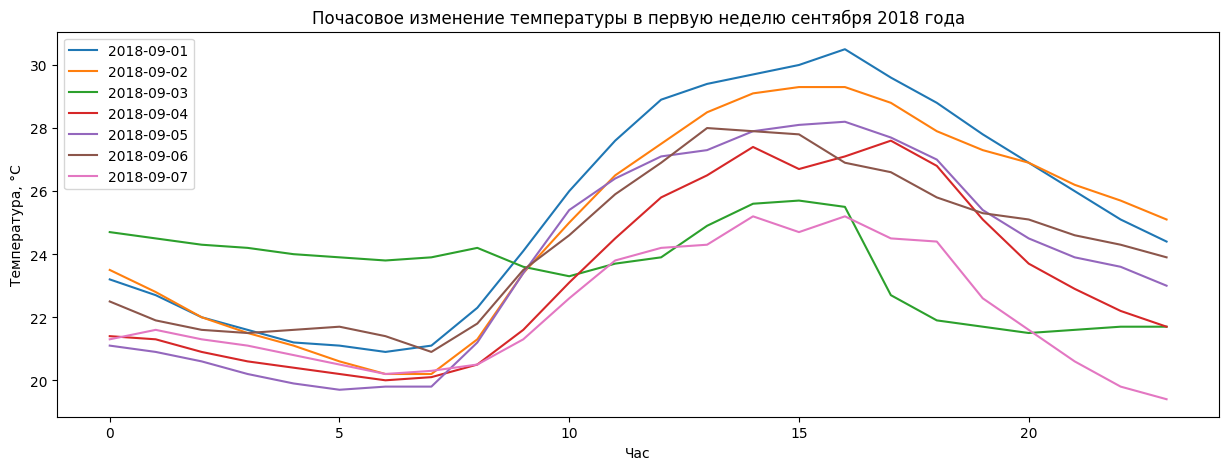

In [17]:
# почасовое изменение температуры в первую неделю сентября 2018 года

first_week_of_september_2018_mask = ((date >= np.datetime64('2018-09-01'))
                                     & (date < np.datetime64('2018-09-08')))

first_week_of_september_2018_data = data[first_week_of_september_2018_mask]

plt.figure(figsize=(15, 5))

for d in np.unique(first_week_of_september_2018_data['Date']):
    plt.plot(first_week_of_september_2018_data[first_week_of_september_2018_data['Date'] == d]['Hour'],
             first_week_of_september_2018_data[first_week_of_september_2018_data['Date'] == d]['Temperature°C'],
             label=d)

plt.xlabel('Час')
plt.ylabel('Температура, °C')
plt.title('Почасовое изменение температуры в первую неделю сентября 2018 года')
plt.legend()
plt.show()


Из графика можно сделать вывод, о том, что температура в первую неделю сентября 2018 года меняется в течение дня примерно по одному и тому же закону. Исключением стало 3 сентрября, когда температура в течение дня почти не изменялась.

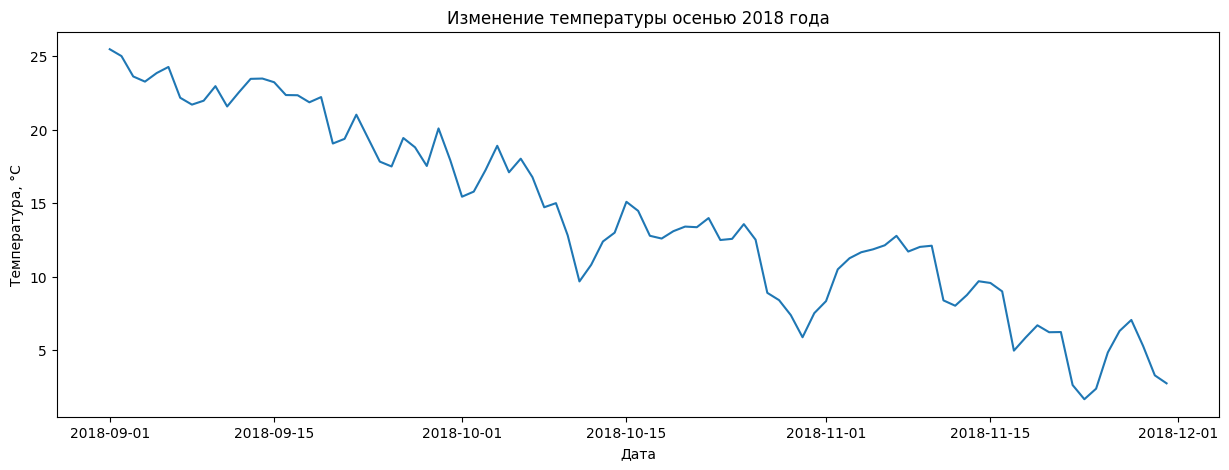

In [18]:
# изменение среднесуточной температуры осенью 2018 года

autumn_2018_mask = (season == "Autumn")
autumn_2018_data = data[autumn_2018_mask]

autumn_2018_day_mean_temperature = np.array([
    np.mean(autumn_2018_data[autumn_2018_data['Date'] == d]['Temperature°C'])
    for d in np.unique(autumn_2018_data['Date'])
])

plt.figure(figsize=(15, 5))
plt.plot(np.unique(autumn_2018_data['Date']), autumn_2018_day_mean_temperature)
plt.xlabel('Дата')
plt.ylabel('Температура, °C')
plt.title('Изменение температуры осенью 2018 года')
plt.show()


Из графика можно сделать вывод, что среднесуточная температура осенью 2018 года имела тенденцию к снижению. Но заметны резкие повышение и понижение температуры, что может быть связано с погодными условиями.

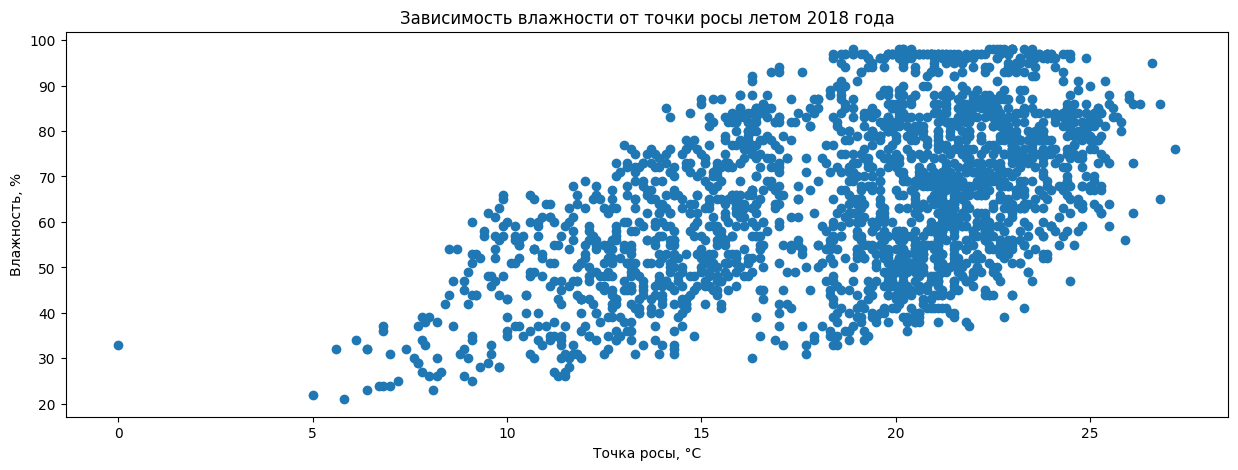

In [19]:
# зависимость влажности от точки росы летом 2018 года

summer_2018_mask = (season == "Summer")
summer_2018_data = data[summer_2018_mask]

plt.figure(figsize=(15, 5))

plt.scatter(summer_2018_data['Dew_point_temperature°C'], summer_2018_data['Humidity'])

plt.xlabel('Точка росы, °C')
plt.ylabel('Влажность, %')
plt.title('Зависимость влажности от точки росы летом 2018 года')
plt.show()


Из графика можно сделать вывод, что влажность и точка росы летом 2018 года имели линейную зависимость.

## II. Операции с векторами и матрицами

### 1. Операции над векторами:

#### Реализуйте операции сложения, вычитания и скалярного умножения для векторов с использованием NumPy

In [20]:
a = np.array([1, 2, 3])
b = np.array([2, -2, 7])

print(a + b)
print(a - b)
print(a * 2)


[ 3  0 10]
[-1  4 -4]
[2 4 6]


#### Экспериментируйте с вещанием (broadcasting), выполняя операции между векторами разной формы (например, изменение значений всех элементов вектора на основе другой переменной).


In [21]:
# brodacasting матрицы(m * n) и вектора(n)

a = np.array([[1, 2, 3, 4],
              [0, 0, 0, 0],
              [1, 1, 1, 1]])
b = np.array([3, 2, 1, 1])

print(a + b)
print(a * b)
print(a / b)


[[4 4 4 5]
 [3 2 1 1]
 [4 3 2 2]]
[[3 4 3 4]
 [0 0 0 0]
 [3 2 1 1]]
[[0.33333333 1.         3.         4.        ]
 [0.         0.         0.         0.        ]
 [0.33333333 0.5        1.         1.        ]]


In [22]:
# broadcasting вектора(n) и вектора(m)

a = np.array([1, 2, 3, 4])
b = np.array([3, 2, 1])

print(a[:, np.newaxis] + b)
print(a[:, np.newaxis] * b)
print(a[:, np.newaxis] / b)


[[4 3 2]
 [5 4 3]
 [6 5 4]
 [7 6 5]]
[[ 3  2  1]
 [ 6  4  2]
 [ 9  6  3]
 [12  8  4]]
[[0.33333333 0.5        1.        ]
 [0.66666667 1.         2.        ]
 [1.         1.5        3.        ]
 [1.33333333 2.         4.        ]]


### 2. Скалярное произведение:

#### Реализуйте вычисление скалярного произведения для векторов, представляющих разные характеристики (например, температура и количество прокачанных велосипедов)

In [23]:
# скалярное произведение температуры и количества прокачанных велосипедов за первый день

first_day_mask = ((date >= np.datetime64('2017-12-01')) & (date < np.datetime64('2017-12-02')))
first_day_data = data[first_day_mask]

first_day_temperature = first_day_data['Temperature°C']
first_day_rented_bike_count = first_day_data['Rented_Bike_Count']

print(first_day_temperature @ first_day_rented_bike_count)


-16999.199999999997


In [24]:
# скалярное произведение средней температуры и влажности за каждый день первых двух недель лета 2018 года

first_two_summer_weeks_mask = ((date >= np.datetime64('2018-06-01'))
                               & (date < np.datetime64('2018-06-15')))

first_two_summer_weeks_data = data[first_two_summer_weeks_mask]
first_two_summer_weeks_days = np.unique(first_two_summer_weeks_data['Date'])

first_two_summer_weeks_day_mean_temperature = np.array([
    np.mean(first_two_summer_weeks_data[first_two_summer_weeks_data['Date'] == d]['Temperature°C'])
    for d in first_two_summer_weeks_days
])

first_two_summer_weeks_day_humidity = np.array([
    np.mean(first_two_summer_weeks_data[first_two_summer_weeks_data['Date'] == d]['Humidity'])
    for d in first_two_summer_weeks_days
])

print(first_two_summer_weeks_day_mean_temperature @ first_two_summer_weeks_day_humidity)


18393.80486111111


#### Продемонстрируйте, как скалярное произведение может быть использовано для нахождения сходства между разными наборами данных

Косинусное сходство: отношение скалярного произведения двух векторов к произведению их длин, показывает, насколько они похожи друг на друга.
Косинусное сходство варьируется от -1 (два вектора противоположны) до 1 (два вектора идентичны).

In [25]:
# косинусное сходство температуры и количества прокачанных велосипедов за первый день

first_day_temperature_length = np.linalg.norm(first_day_temperature)
first_day_rented_bike_count_length = np.linalg.norm(first_day_rented_bike_count)

print((first_day_temperature @ first_day_rented_bike_count) / (
        first_day_temperature_length * first_day_rented_bike_count_length))


-0.36573799333676815


Из значени -0.36 можно сделать вывод, что температура и количество прокачанных велосипедов за первый день мало похожи.
Это может означать, что зимой температура имеет меньшее влияние на количество прокачанных велосипедов.

In [26]:
# косинусное сходство средней температуры и влажности за каждый день первых двух недель лета 2018 года

first_two_summer_weeks_day_mean_temperature_length = np.linalg.norm(first_two_summer_weeks_day_mean_temperature)
first_two_summer_weeks_day_humidity_length = np.linalg.norm(first_two_summer_weeks_day_humidity)

print((first_two_summer_weeks_day_mean_temperature @ first_two_summer_weeks_day_humidity) / (
        first_two_summer_weeks_day_mean_temperature_length * first_two_summer_weeks_day_humidity_length))


0.9800723003069363


Из значения 0.98 можно сделать вывод, что средняя температура и влажность за каждый день первых двух недель лета 2018 года похожи друг на друга.
Это может означать, что летом температура и влажность сильно зависят друг от друга.

## III. Анализ сходства между векторами

#### Проверьте правильность своих функций, сравнив их с аналогичными функциями из NumPy/SciPy.

### 1. Корреляция и косинусное сходство:

#### Реализуйте функции для вычисления коэффициента корреляции Пирсона и косинусного сходства между векторами данных, например, между погодными условиями и количеством прокачанных велосипедов.


In [27]:
# функция для вычисления коэффициента корреляции Пирсона

"""
Коэффициент корреляции Пирсона:
показывает насколько переменные линейно зависимы
1 - значения линейно зависимы
0 - значения не зависимы
-1 - значения линейно обратно зависимы
"""


def pearson_correlation(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    return sum((x - x_mean) * (y - y_mean)) / np.sqrt(sum((x - x_mean) ** 2) * sum((y - y_mean) ** 2))


"""
Косинусное сходство:
показывает насколько два вектора направлены в одну сторону
1 - вектора идентичны
0 - вектора перпендикулярны
-1 - вектора противоположны
"""


def cosine_similarity(x, y):
    x_norm = np.linalg.norm(x)
    y_norm = np.linalg.norm(y)
    return (x @ y) / (x_norm * y_norm)


In [28]:
# коэффициент корреляции Пирсона и косинусное сходство средней температуры и количества прокачанных велосипедов за каждый день в июле 2018 года

july_2018_mask = ((date >= np.datetime64('2018-07-01'))
                  & (date < np.datetime64('2018-08-01')))

july_2018_data = data[july_2018_mask]
july_2018_days = np.unique(july_2018_data['Date'])

july_2018_day_mean_temperature = np.array([
    np.mean(july_2018_data[july_2018_data['Date'] == d]['Temperature°C'])
    for d in july_2018_days
])

july_2018_day_rented_bike_count = np.array([
    np.sum(july_2018_data[july_2018_data['Date'] == d]['Rented_Bike_Count'])
    for d in july_2018_days
])

print("Мои функции")
print("корреляция Пирсона",
      pearson_correlation(july_2018_day_mean_temperature, july_2018_day_rented_bike_count))
print("косинусное сходство",
      cosine_similarity(july_2018_day_mean_temperature, july_2018_day_rented_bike_count))

print("NumPy/SciPy")
print("корреляция Пирсона",
      np.corrcoef(july_2018_day_mean_temperature, july_2018_day_rented_bike_count)[0, 1])
print("косинусное сходство",
      1 - sp.spatial.distance.cosine(july_2018_day_mean_temperature, july_2018_day_rented_bike_count))


Мои функции
корреляция Пирсона 0.2627833482891958
косинусное сходство 0.9580563019059269
NumPy/SciPy
корреляция Пирсона 0.2627833482891957
косинусное сходство 0.9580563019059269


Высокое косинусное сходство говорит, что температура и количество арендованных велосипедов меняются схожим образом.

Низкая корреляция Пирсона говорит, что между ними нет строгой линейной зависимости – температура влияет на аренду велосипедов, но это не единственный фактор, и связь может быть нелинейной.

### 2. Нормализация векторов:

#### Напишите функцию для нормализации векторов данных до единичной длины. Это может быть полезно для сравнения различных переменных, таких как количество прокачанных велосипедов и погодные условия.

In [29]:
# функция для нормализации векторов

"""
Нормализация вектора:
приведение вектора к единичной длине
"""


def normalize(v):
    norm = np.sqrt(np.sum(v ** 2))
    return v / norm


изначальный вектор [-3.94314516 -1.66473214  8.04448925 12.94805556 18.14435484 23.13680556
 27.76397849 28.73642473 21.49875    13.0891129   7.80902778]
Моя функция
нормализованный вектор [-0.06756144 -0.02852335  0.13783345  0.22185065  0.3108835   0.39642364
  0.47570514  0.49236694  0.36835737  0.22426751  0.13379908]
Numpy
нормализованный вектор [-0.06756144 -0.02852335  0.13783345  0.22185065  0.3108835   0.39642364
  0.47570514  0.49236694  0.36835737  0.22426751  0.13379908]


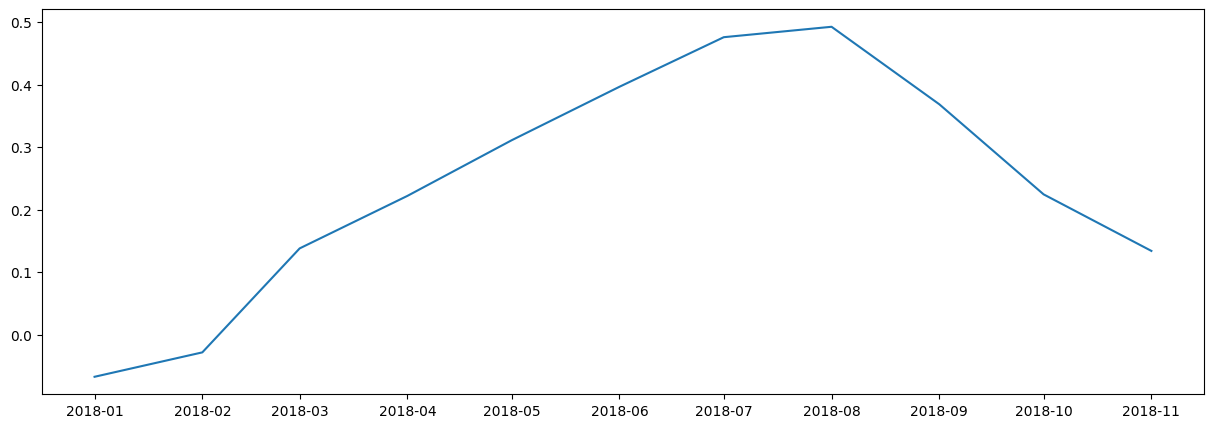

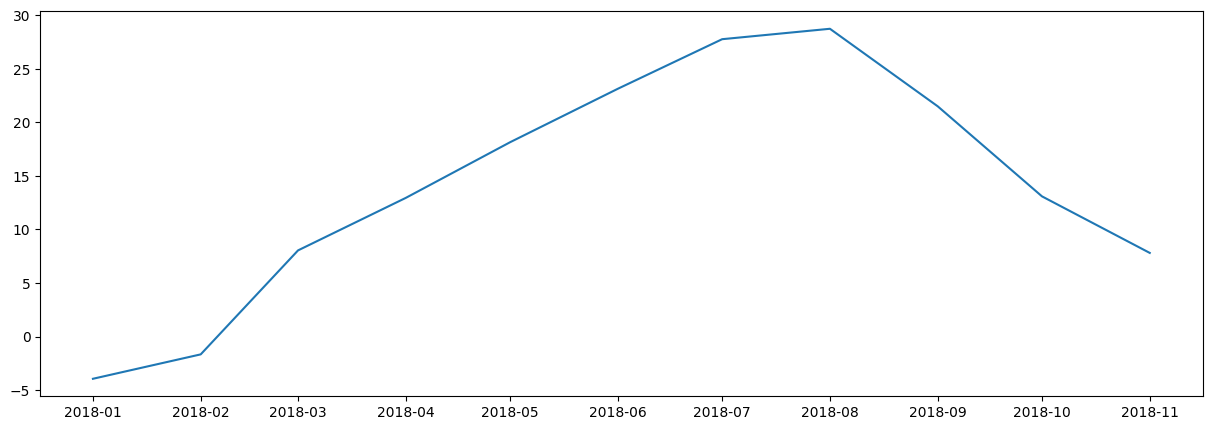

In [30]:
# нормализация средней температуры за каждый месяц 2018 года

year_2018_mask = (date >= np.datetime64('2018-01-01')) & (date < np.datetime64('2019-01-01'))
year_2018_data = data[year_2018_mask]

year_2018_months = np.unique(year_2018_data['Date'].astype('datetime64[M]'))
year_2018_month_mean_temperature = np.array([
    np.mean(year_2018_data[(year_2018_data['Date'].astype('datetime64[M]') == m)]['Temperature°C'])
    for m in year_2018_months
])

print("изначальный вектор", year_2018_month_mean_temperature)
print("Моя функция")
print("нормализованный вектор", normalize(year_2018_month_mean_temperature))
print("Numpy")
print("нормализованный вектор", (year_2018_month_mean_temperature / np.linalg.norm(year_2018_month_mean_temperature)))

plt.figure(figsize=(15, 5))
plt.plot(year_2018_months, normalize(year_2018_month_mean_temperature))
plt.show()
plt.figure(figsize=(15, 5))
plt.plot(year_2018_months, year_2018_month_mean_temperature)
plt.show()

Из графиков видно, что нормализация вектора не меняет его форму, но приводит к изменению масштаба. Это позволяет сравнивать разные вектора, не учитывая их абсолютные значения.

### 3. Поиск сходства:


#### Реализуйте функцию, которая принимает вектор запроса (например, данные за один день) и набор векторов данных (например, все данные по месяцам) и возвращает индексы наиболее похожих дней.


In [31]:
# функция для поиска наиболее похожих дней

"""
Поиск наиболее похожих дней:
возвращает 5 наиболее похожих дней по косинусному сходству
и 5 наиболее похожих дней по корреляции Пирсона
"""


def find_similar_days(data_table, day, criteria):
    day_vector = data_table[data_table['Date'] == day]
    day_data = day_vector[criteria]
    data_table_data = data_table[criteria]
    days = np.unique(data_table['Date'])
    days = days[days != day]

    days_similarity_cosine = np.array([
        (cosine_similarity(day_data, data_table_data[data_table['Date'] == d]), d)
        for d in days
    ])

    days_similarity_pearson = np.array([
        (pearson_correlation(day_data, data_table_data[data_table['Date'] == d]), d)
        for d in days
    ])

    days_similarity_cosine = days_similarity_cosine[np.argsort(days_similarity_cosine[:, 0])[::-1]]
    days_similarity_pearson = days_similarity_pearson[np.argsort(days_similarity_pearson[:, 0])[::-1]]

    return days_similarity_cosine[:5], days_similarity_pearson[:5]


In [37]:
# поиск наиболее похожих дней на 3 сентября 2018 года по температуре

similar_days = find_similar_days(data, np.datetime64('2018-09-03'), 'Temperature°C')

print("Косинусное сходство")
print(similar_days[0])

print("Корреляция Пирсона")
print(similar_days[1])


Косинусное сходство
[[np.float64(0.9994233918261535) np.datetime64('2018-09-16')]
 [np.float64(0.9990622846253796) np.datetime64('2018-08-09')]
 [np.float64(0.9989587481946612) np.datetime64('2018-08-24')]
 [np.float64(0.9987644683530906) np.datetime64('2018-08-23')]
 [np.float64(0.9987390456231471) np.datetime64('2018-10-05')]]
Корреляция Пирсона
[[np.float64(0.8861791557802927) np.datetime64('2017-12-26')]
 [np.float64(0.857825670452483) np.datetime64('2018-01-10')]
 [np.float64(0.8315200995407261) np.datetime64('2018-02-10')]
 [np.float64(0.8214096310287465) np.datetime64('2017-12-07')]
 [np.float64(0.8201472911332581) np.datetime64('2018-03-01')]]


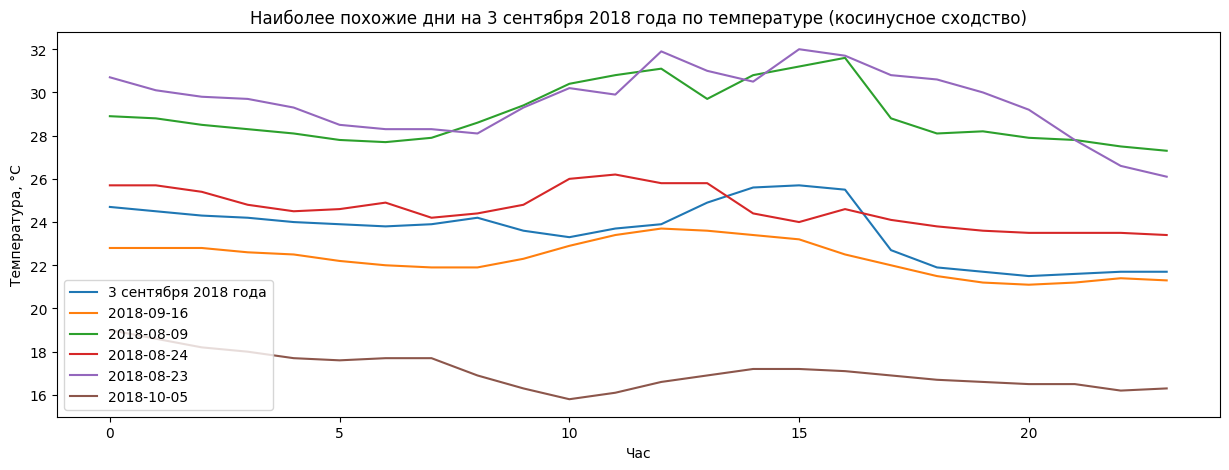

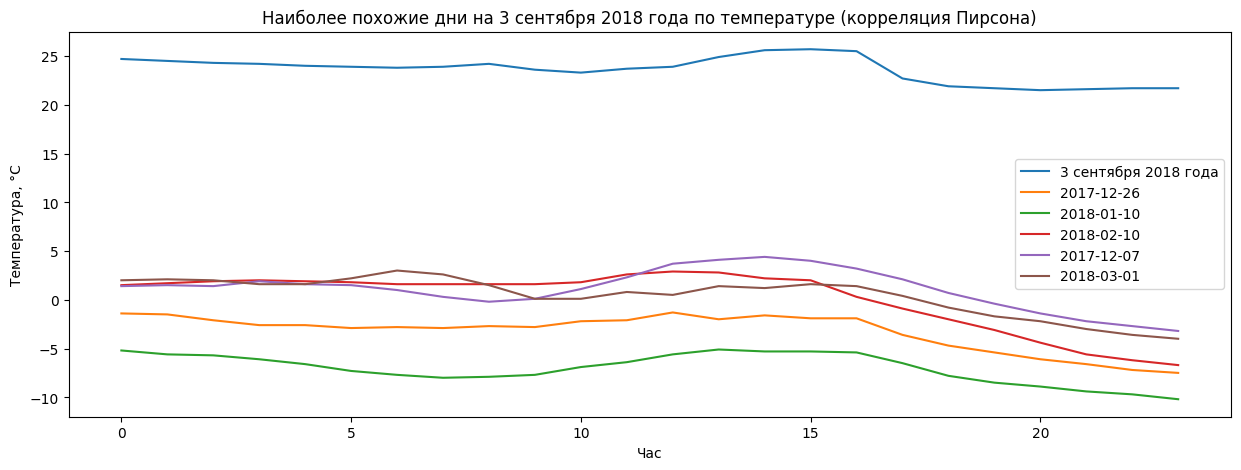

In [38]:
# графики наиболее похожих дней на 3 сентября 2018 года по температуре

similar_days_by_cosine = similar_days[0][:, 1]
similar_days_by_pearson = similar_days[1][:, 1]

plt.figure(figsize=(15, 5))

plt.plot(data[date == np.datetime64('2018-09-03')]['Hour'],
         data[date == np.datetime64('2018-09-03')]['Temperature°C'],
         label='3 сентября 2018 года')

for d in similar_days_by_cosine:
    plt.plot(data[date == d]['Hour'],
             data[date == d]['Temperature°C'],
             label=d)

plt.xlabel('Час')
plt.ylabel('Температура, °C')
plt.title('Наиболее похожие дни на 3 сентября 2018 года по температуре (косинусное сходство)')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))

plt.plot(data[date == np.datetime64('2018-09-03')]['Hour'],
         data[date == np.datetime64('2018-09-03')]['Temperature°C'],
         label='3 сентября 2018 года')

for d in similar_days_by_pearson:
    plt.plot(data[date == d]['Hour'],
             data[date == d]['Temperature°C'],
             label=d)

plt.xlabel('Час')
plt.ylabel('Температура, °C')
plt.title('Наиболее похожие дни на 3 сентября 2018 года по температуре (корреляция Пирсона)')
plt.legend()
plt.show()


Из результатов видно, что наиболее похожими по тенденциям (косинусное сходство) изменений оказались дни конца лета и начала осени. Потому температуры имеют более схожие перепады и значения в эти дни.

Но наибольшая линейная зависимость (корреляция Пирсона) оказалась у дней зимы. Что может говорить о том, что температура в эти дни имеет больщую линейную зависимость с температурой 3 сентября 2018 года.

## IV. Прогнозирование и кластеризация

### 1. Фильтрация временных рядов:

#### Реализуйте простой фильтр временных рядов, используя скалярное произведение. Примените его для сглаживания данных о прокате велосипедов.

In [63]:
# фильтр временных рядов

"""
Фильтр временных рядов:
сглаживает данные по заданному окну
"""


def easy_time_series_filter(data, window):
    filtered_data = []
    for i in range(len(data)):
        start = max(0, i - window // 2)
        end = min(len(data), i + window // 2)
        filtered_data.append(np.mean(data[start:end]))
    return np.array(filtered_data)


#### Экспериментируйте с разными ядрами (например, для выделения трендов или сглаживания).

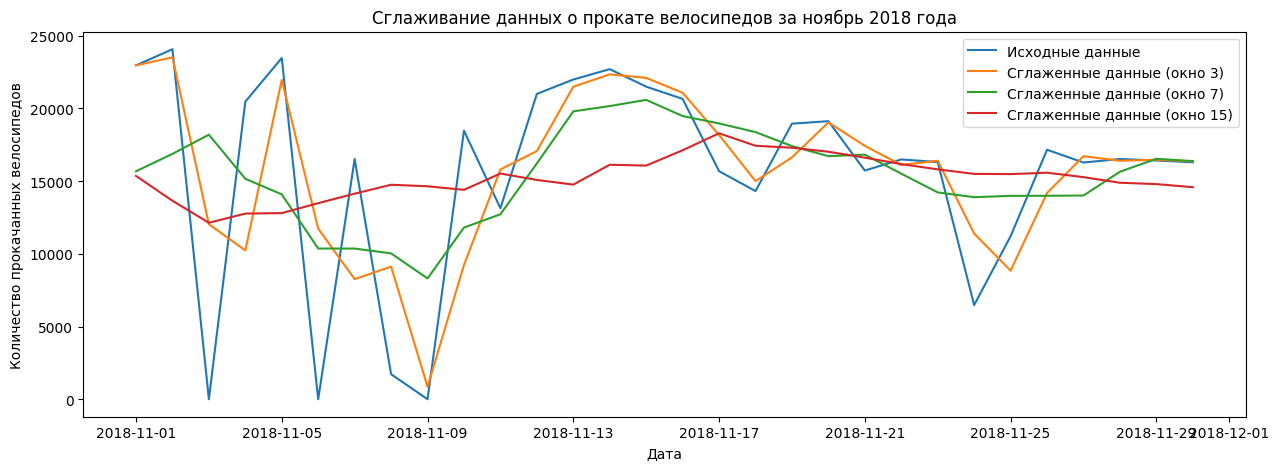

In [64]:
# сглаживание данных о прокате велосипедов за каждый день ноября 2018 года

november_2018_mask = ((date >= np.datetime64('2018-11-01')) & (date < np.datetime64('2018-12-01')))
november_2018_data = data[november_2018_mask]
november_2018_days = np.unique(november_2018_data['Date'])
november_2018_rented_bike_count = np.array([
    np.sum(november_2018_data[november_2018_data['Date'] == d]['Rented_Bike_Count'])
    for d in november_2018_days
])

plt.figure(figsize=(15, 5))

plt.plot(november_2018_days, november_2018_rented_bike_count, label='Исходные данные')

plt.plot(november_2018_days, easy_time_series_filter(november_2018_rented_bike_count, 3),
         label='Сглаженные данные (окно 3)')

plt.plot(november_2018_days, easy_time_series_filter(november_2018_rented_bike_count, 7),
         label='Сглаженные данные (окно 7)')

plt.plot(november_2018_days, easy_time_series_filter(november_2018_rented_bike_count, 15),
         label='Сглаженные данные (окно 15)')

plt.xlabel('Дата')
plt.ylabel('Количество прокачанных велосипедов')
plt.title('Сглаживание данных о прокате велосипедов за ноябрь 2018 года')
plt.legend()
plt.show()


Из графика видно, что с увеличением окна сглаживания данные становятся более гладкими и менее подверженными шумам. Но при этом теряется часть информации о резких изменениях.

### 2. Кластеризация методом k-средних:

#### Реализуйте алгоритм кластеризации методом k-средних с использованием NumPy, чтобы группировать дни по схожести в прокате велосипедов.

In [65]:
# алгоритм кластеризации методом k-средних

"""
Кластеризация методом k-средних:
группировка на k кластеров
сначала центры кластеров (центроиды)
выбираются случайно, затем данные перераспределяются
по мере пересчета центроидов
"""


def k_means(data, k, max_iterations=100):
    np.random.seed(0)
    centroids = data[np.random.choice(len(data), k, replace=False)]

    for _ in range(max_iterations):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

        labels = np.argmin(distances, axis=1)

        new_centriods = np.array([data[labels == j].mean(axis=0) for j in range(k)])

        if np.all(centroids == new_centriods):
            break

        centroids = new_centriods

    return labels, centroids


#### Начните с фиксированного числа кластеров, а затем исследуйте, как влияет изменение значения k на результаты.

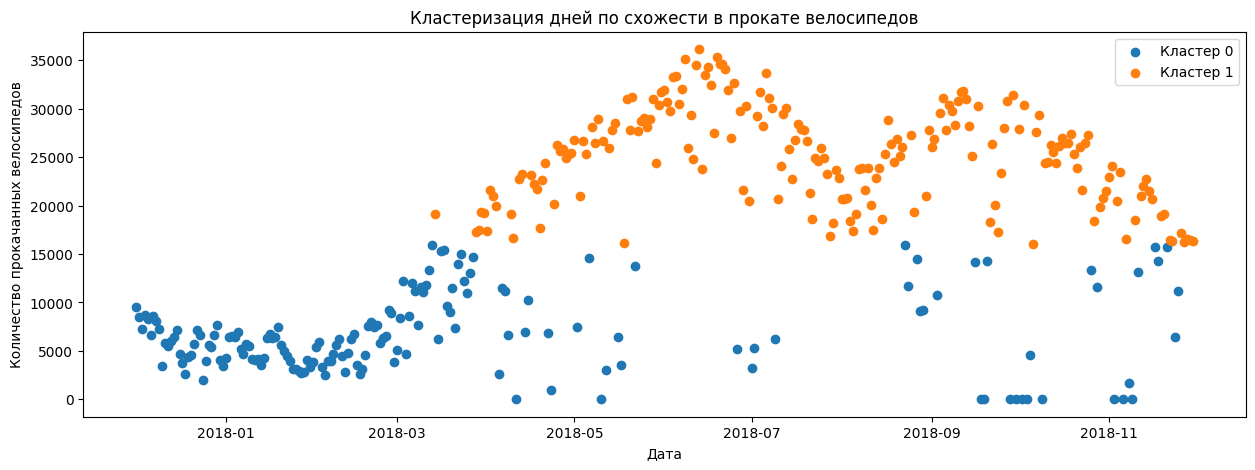

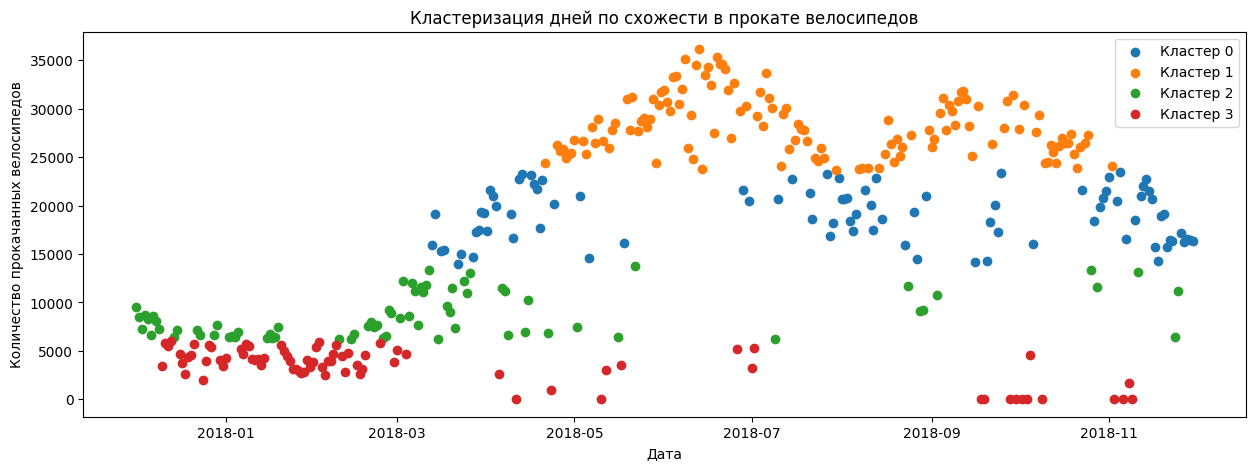

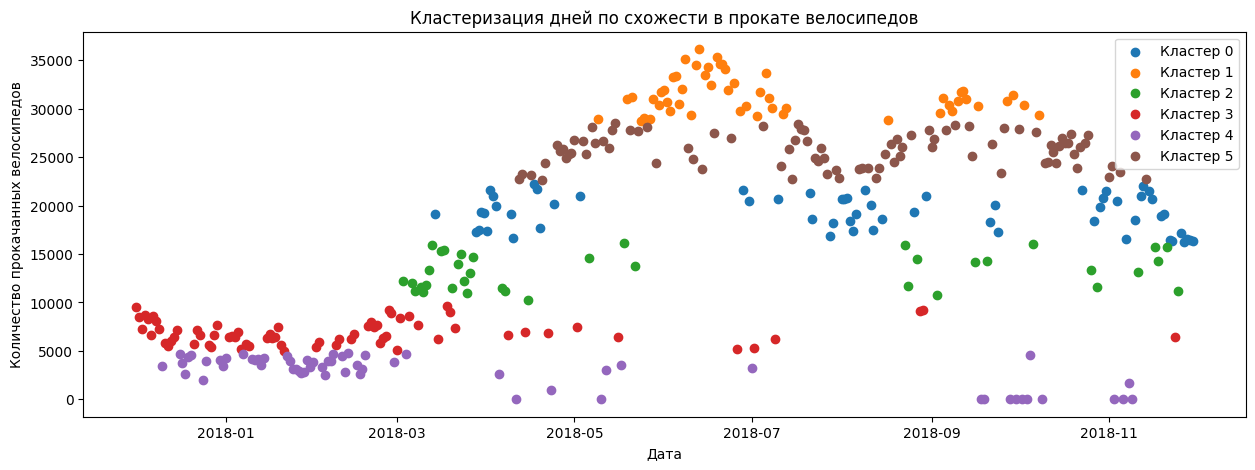

In [66]:
# кластеризация дней по схожести в прокате велосипедов

rented_bike_count_data = np.array([
    np.sum(data[date == d]['Rented_Bike_Count'])
    for d in np.unique(date)
])

for k in range(2, 7, 2):
    labels, centroids = k_means(rented_bike_count_data[:, np.newaxis], k)

    plt.figure(figsize=(15, 5))
    for i in range(k):
        plt.scatter(np.unique(date)[labels == i], rented_bike_count_data[labels == i], label=f'Кластер {i}')
    plt.xlabel('Дата')
    plt.ylabel('Количество прокачанных велосипедов')
    plt.title('Кластеризация дней по схожести в прокате велосипедов')
    plt.legend()
    plt.show()


По графикам видно, что кластеризация происходит по количеству прокатов велосипедов. При увеличении числа кластеров увеличивается точность кластеризации, но уменьшается их интерпретируемость.

## V. Генерация случайных данных и анализ

### 1. Генерация случайных данных:

#### Используйте np.random для генерации случайных данных, которые могут быть использованы для тестирования ваших функций. Например, сгенерируйте случайные погодные условия и соответствующие значения проката велосипедов.

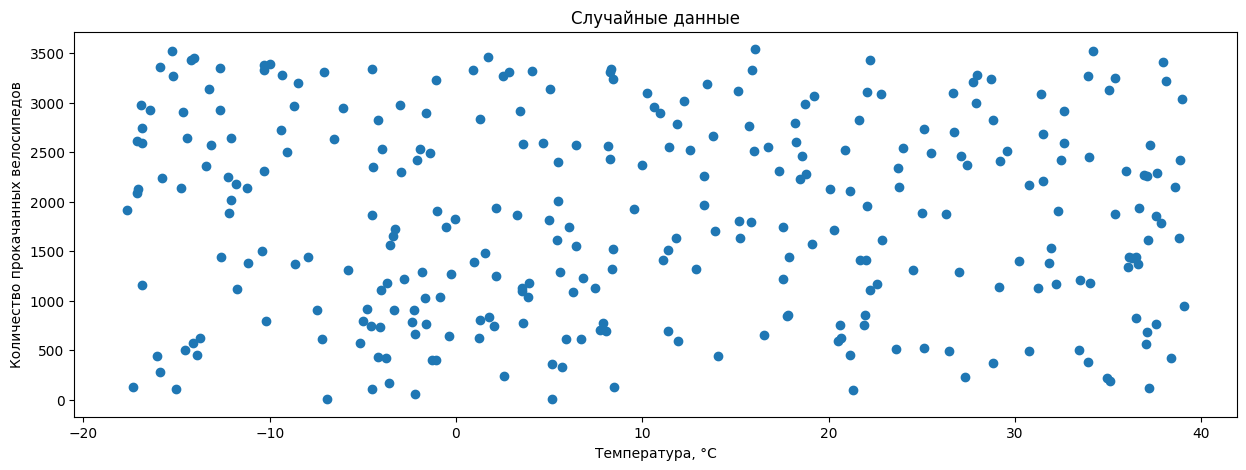

In [67]:
# генерация случайных данных за 300 дней

random_temperature = np.random.uniform(temperature.min(), temperature.max(), 300)
random_rented_bike_count = np.random.randint(rented_bike_count.min(), rented_bike_count.max(), 300)

plt.figure(figsize=(15, 5))
plt.scatter(random_temperature, random_rented_bike_count)
plt.xlabel('Температура, °C')
plt.ylabel('Количество прокачанных велосипедов')
plt.title('Случайные данные')
plt.show()


### 2. Анализ случайных данных:


#### Сравните случайные данные с реальными данными, используя методы корреляции и сходства.

In [68]:
# сравнение случайных данных с реальными данными

first_300_days = np.unique(date)[:300]
first_300_days_rented_bike_count = np.array([
    np.sum(data[date == d]['Rented_Bike_Count'])
    for d in first_300_days
])
first_300_days_temperature = np.array([
    np.mean(data[date == d]['Temperature°C'])
    for d in first_300_days
])

print("Корреляция Пирсона")
print("Реальные данные", pearson_correlation(first_300_days_temperature, first_300_days_rented_bike_count))
print("Случайные данные", pearson_correlation(random_temperature, random_rented_bike_count))

print("Косинусное сходство")
print("Реальные данные", cosine_similarity(first_300_days_temperature, first_300_days_rented_bike_count))
print("Случайные данные", cosine_similarity(random_temperature, random_rented_bike_count))


Корреляция Пирсона
Реальные данные 0.7683077275212344
Случайные данные -0.012734004214690649
Косинусное сходство
Реальные данные 0.8966738269653276
Случайные данные 0.45057819464781224


Из результатов видно, что случайные данные не имеют линейной зависимости и схожести с количеством прокатов велосипедов. Потому значения корреляции Пирсона и косинусного сходства близки к нулю.